# The Suicide Rates Overview 1985 to 2015
---





In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Final-Term-Project (CS245)/master.csv')
suic_data = data.copy()

#Dataset Description:
---
- Column1 - ``country``: จำนวนประเทศที่มีการบันทึกสถิติข้อมูลอัตรการฆ่าตัวตายตั้งแต่ปีค.ศ.1985 ถึง ค.ศ.2015
- Column2 - ``year``: ประเทศจำนวน 98 ประเทศทั่วโลก
- Column3 - ``gender`` เพศของผู้ที่ถูกบันทึกข้อมูลในชุดข้อมูล ได้แก่ เพศหญิง และ เพศชาย
- Column4 - ``age``ช่วงอายุ ได้แก่ 15-24 ปี,25-34 ปี, 35-54 ปี,55-74 ปี และ 74ปีขึ้นไป
- Column5 - ``suicides_no``จำนวนผู้เสียชีวิตจากการ commit suicide
- Column6 - ``population`` จำนวนประชากรของประเทศนั้นๆ
- Column7 - ``suicide_per_100k``อัตราส่วนผู้เสียชีวิตจากการ commit suicideต่อจำนวนประชากรในประเทศจจำนวน100,000 คน
- Column8 - ``country_year`` ประเทศและปีที่บันทึกข้อมูล
- Column9 - ``hdi for year`` ดัชนีการพัฒนามนุษย์ของประเทศนั้นต่อปี
- Column10 - ``gdp_per_year`` ผลิตภัณฑ์มวลรวมในประเทศของประเทศนั้นต่อปี
- Column11 - ``gdp_per_capita``ผลิตภัณฑ์มวลรวมในประเทศต่อประชากรของประเทศนั้นต่อปี
- Column12 - ``generation`` ชั่วอายุของผู้เสียชีวิตที่ทำการ commit suicide
---
##Dataset Information






In [ ]:
print("Dimension of dataframe :",suic_data.ndim)
print("The shape of dataframe :",suic_data.shape)
print("Size of dataframe :",suic_data.size)

Dimension of dataframe : 2
The shape of dataframe : (27820, 12)
Size of dataframe : 333840


In [ ]:
suic_data.columns = ['country', 'year', 'gender', 'age', 'suicides_no', 'population','suicide_per_100k',
                      'country_year', 'hdi_for_year', 'gdp_per_year', 'gdp_per_capita', 'generation']
suic_data.columns

Index(['country', 'year', 'gender', 'age', 'suicides_no', 'population',
       'suicide_per_100k', 'country_year', 'hdi_for_year', 'gdp_per_year',
       'gdp_per_capita', 'generation'],
      dtype='object')

In [ ]:
suic_data.head()

,country,year,gender,age,suicides_no,population,suicide_per_100k,country_year,hdi_for_year,gdp_per_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [ ]:
suic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country           27820 non-null  object 
 1   year              27820 non-null  int64  
 2   gender            27820 non-null  object 
 3   age               27820 non-null  object 
 4   suicides_no       27820 non-null  int64  
 5   population        27820 non-null  int64  
 6   suicide_per_100k  27820 non-null  float64
 7   country_year      27820 non-null  object 
 8   hdi_for_year      8364 non-null   float64
 9   gdp_per_year      27820 non-null  object 
 10  gdp_per_capita    27820 non-null  int64  
 11  generation        27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


# Data Cleaning

---
1. ลบคอลัมน์ 'country_year' ออกด้วยการ dropped เพื่อทำให้การจัดการข้อมูลง่ายขึ้น
2. ตรวจสอบหาปีที่มีการบันทึกข้อมูลได้จำนวนน้อยแล้วทำการ dropped ปีนั้นออกไปจากชุดข้อมูลนั่นคือ ปีค.ศ. 2016 ที่มีจำนวนข้อมูลเพียง 160 ข้อมูล
3. ตรวจสอบประเทศที่ไม่มีการบันทึจำนวนผู้เสียชีวิตจาก commiit suicide (missing value) แล้วทำการ dropped ออกจากชุดข้อมูล ได้แก่ ประเทศ Dominica และ Saint Kitts and Nevis
4. ทำการตรวจสอบข้อมูลที่เป็น missing value พบว่าคอลัมน์ hdi_for_year นั้นมีค่าของข้อมูลที่เป็น Nan จึงทำการ fill ค่าแทนที่ด้วย 0 เพื่อจัดการ missing value
5. ทำการตรวจสอบชุดข้อมูลว่ามี missing value หรือไม่และตรวจสอบขนาดข้อมูลตรงกับที่ทำ Data cleaning หรือไม่


In [ ]:
# Remove column 'country_year' of the feature lists
suic_data.drop("country_year", axis = 1, inplace = True)

In [ ]:
# check year less data
print(suic_data["year"].value_counts())

2009    1068
2001    1056
2010    1056
2007    1032
2011    1032
2002    1032
2003    1032
2000    1032
2006    1020
2008    1020
2005    1008
2004    1008
1999     996
2012     972
2013     960
1998     948
2014     936
1995     936
1996     924
1997     924
1994     816
1992     780
1993     780
1990     768
1991     768
2015     744
1987     648
1989     624
1988     588
1986     576
1985     576
2016     160
Name: year, dtype: int64


In [ ]:
## drop year '2016'
suic_drop_2016 = suic_data[suic_data['year']==2016].index
suic_data.drop(suic_drop_2016, axis=0, inplace=True)

In [ ]:
suic_no = suic_data.groupby('country')['suicides_no'].sum()
suic_no[(suic_no.values)==0].keys

<bound method Series.keys of country
Dominica                 0
Saint Kitts and Nevis    0
Name: suicides_no, dtype: int64>

In [ ]:
## drop countries 'Dominica'
drop_no_1 = suic_data[suic_data['country']=='Dominica'].index
suic_data.drop(drop_no_1, axis=0, inplace=True)

## drop countries 'Saint Kitts and Nevis'
drop_no_2 = suic_data[suic_data['country']=='Saint Kitts and Nevis'].index
suic_data.drop(drop_no_2, axis=0, inplace=True)


In [ ]:
print("Checked the missing value of the dataset :\n",suic_data.isnull().any(),"\n\n")
print("Checked a number of missing values of the dataset :\n",suic_data.isnull().sum(),"\n\n")

Checked the missing value of the dataset :
 country             False
year                False
gender              False
age                 False
suicides_no         False
population          False
suicide_per_100k    False
hdi_for_year         True
gdp_per_year        False
gdp_per_capita      False
generation          False
dtype: bool 


Checked a number of missing values of the dataset :
 country                 0
year                    0
gender                  0
age                     0
suicides_no             0
population              0
suicide_per_100k        0
hdi_for_year        19248
gdp_per_year            0
gdp_per_capita          0
generation              0
dtype: int64 




In [ ]:
## fill missimg value of column 'hdi_for_year'
suic_data['hdi_for_year'] = suic_data['hdi_for_year'].fillna(0)

suic_data.isnull().sum


<bound method DataFrame.sum of        country   year  gender  ...  gdp_per_year  gdp_per_capita  generation
0        False  False   False  ...         False           False       False
1        False  False   False  ...         False           False       False
2        False  False   False  ...         False           False       False
3        False  False   False  ...         False           False       False
4        False  False   False  ...         False           False       False
...        ...    ...     ...  ...           ...             ...         ...
27815    False  False   False  ...         False           False       False
27816    False  False   False  ...         False           False       False
27817    False  False   False  ...         False           False       False
27818    False  False   False  ...         False           False       False
27819    False  False   False  ...         False           False       False

[27612 rows x 11 columns]>

In [ ]:
#@title  The current size of Dataset:  (27612, 11)
print('\n The current size of Dataset: ',suic_data.shape,'\n')
suic_data.sample(5)


 The current size of Dataset:  (27612, 11) 



,country,year,gender,age,suicides_no,population,suicide_per_100k,hdi_for_year,gdp_per_year,gdp_per_capita,generation
9251,France,1998,female,15-24 years,140,3836900,3.65,0.000,"1,503,108,739,159",27190,Generation X
15169,Lithuania,2005,female,75+ years,34,154994,21.94,0.806,"26,125,575,942",8229,Silent
17214,Netherlands,1997,female,75+ years,70,598400,11.70,0.000,"412,199,006,099",28156,G.I. Generation
17288,Netherlands,2003,female,35-54 years,193,2416242,7.99,0.000,"571,863,431,151",37614,Boomers
14731,Kyrgyzstan,2010,female,5-14 years,4,507097,0.79,0.634,"4,794,357,795",991,Generation Z


# **Data Wrangling**
---

*   Statistics of the Dataset
1. แสดงค่าข้อมูลทางสถิติของชุดข้อมูล
2. ทำการตรวจสอบปีที่มีการบันทึกข้อมูลว่าเริ่มและสิ้นสุดในปีพ.ศ.ใด
3. ทำ Data Wrangling ด้วยการ groupby ชุดข้อมูลแล้วจัดเรียงเพื่อหาอันดับของชุดข้อมูลต่างๆด้วยการ sort.value
4. สามาารถนำสถิติข้อมูลที่ทำการ Data wranngling ไปทำ Dat visualization เพื่อทำการวิเคราะห์ข้อมูลต่อได้



In [ ]:
suic_data.describe().T

,count,mean,std,min,25%,50%,75%,max
year,27612.0,2.001193e+03,8.411227e+00,1985.0,1995.00,2002.0,2008.000,2.015000e+03
suicides_no,27612.0,2.438366e+02,9.052191e+02,0.0,3.00,25.0,132.000,2.233800e+04
population,27612.0,1.853899e+06,3.923308e+06,278.0,98250.50,432590.5,1494741.000,4.380521e+07
suicide_per_100k,27612.0,1.283487e+01,1.898102e+01,0.0,0.93,6.0,16.650,2.249700e+02
hdi_for_year,27612.0,2.352416e-01,3.605486e-01,0.0,0.00,0.0,0.679,9.440000e-01
gdp_per_capita,27612.0,1.683695e+04,1.887085e+04,251.0,3436.00,9321.0,24870.000,1.263520e+05


In [ ]:
#@title ชุดข้อมูลนี้มีการเริ่มเก็บข้อมูลระหว่างปีค.ศ.1985 ถึง ปีค.ศ.2015
min_year = min(suic_data.year)
max_year = max(suic_data.year)
print("The range of year in Dataset is starting from",min_year,'to',max_year)

The range of year in Dataset is starting from 1985 to 2015


In [ ]:
#@title The ranking with the highest average suicide rates by Year(1985s - 2015s):
avg_no_country = suic_data.groupby("year",as_index=False)["suicide_per_100k"].mean()
avg_no_country.sort_values("suicide_per_100k",ascending = False).head(20).style.background_gradient(cmap='Reds', subset=['suicide_per_100k'])

,year,suicide_per_100k
10,1995,15.662671
11,1996,15.305422
12,1997,14.954361
13,1998,14.926920
14,1999,14.532038
9,1994,14.073272
15,2000,13.941328
8,1993,13.833705
17,2002,13.786550
7,1992,13.709479


In [ ]:
#@title The ranking with the highest numbers of suicide by Year(1985s - 2015s):
avg_no_country = suic_data.groupby("year",as_index=False)["suicides_no"].mean()
avg_no_country.sort_values("suicides_no",ascending = False).head(20).style.background_gradient(cmap='Reds', subset=['suicides_no'])

,year,suicides_no
9,1994,284.390931
8,1993,284.057692
7,1992,275.355469
30,2015,273.709677
11,1996,267.018398
13,1998,263.281646
6,1991,261.931217
12,1997,260.546537
10,1995,260.196581
14,1999,257.147590


In [ ]:
#@title The statistics of suicide by Gender(1985s - 2015s):

pd.DataFrame(suic_data.groupby('gender')[['suicides_no','suicide_per_100k']].mean())

,suicides_no,suicide_per_100k
gender,,
female,112.705056,5.405569
male,374.968202,20.264172


In [ ]:
#@title The statistics of suicide by Age(1985s - 2015s):
pd.DataFrame(suic_data.groupby('age')[['suicides_no','suicide_per_100k']].mean())

,suicides_no,suicide_per_100k
age,,
15-24 years,175.433942,8.972753
25-34 years,243.772708,12.220687
35-54 years,531.589526,14.984891
5-14 years,11.356801,0.621119
55-74 years,359.349848,16.191478
75+ years,141.516949,24.018294


In [ ]:
#@title The statistics of suicide by Generation(1985s - 2015s):
pd.DataFrame(suic_data.groupby('generation')[['suicides_no','suicide_per_100k']].mean())


,suicides_no,suicide_per_100k
generation,,
Boomers,460.934695,14.775987
G.I. Generation,186.679722,24.051559
Generation X,239.949403,10.562995
Generation Z,10.820408,0.642299
Millenials,107.374307,5.347947
Silent,281.449557,18.429590


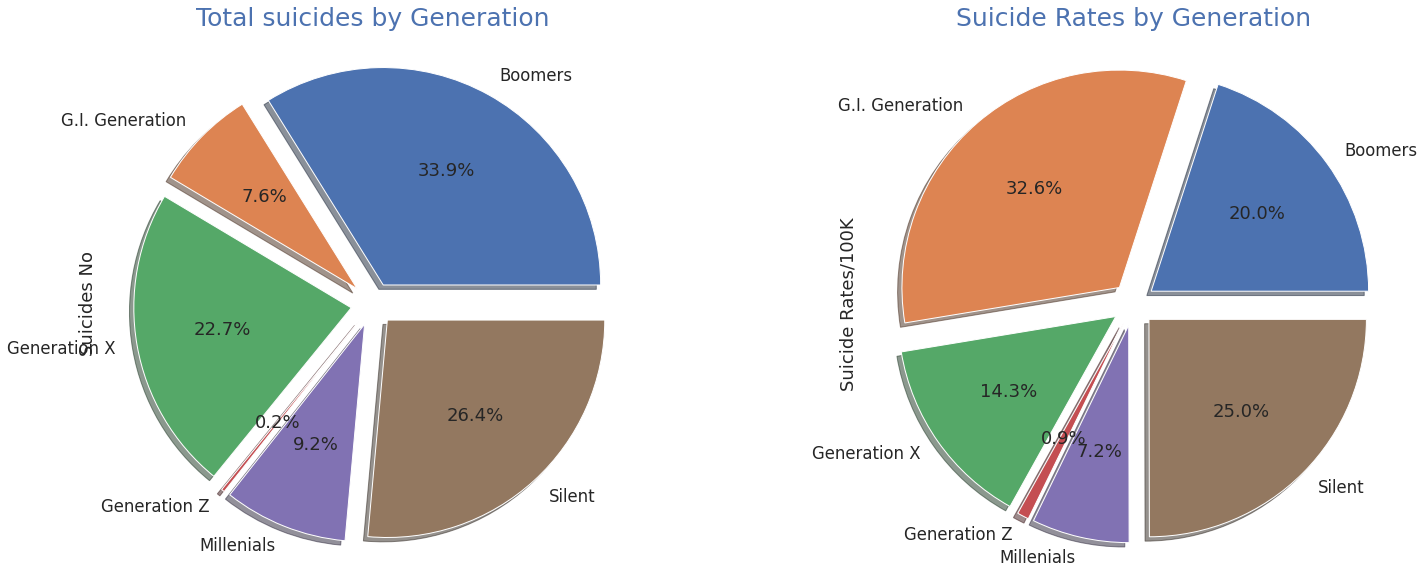

In [ ]:
#@title Suicide Rates By Generation
f,ax = plt.subplots(1,2,figsize=(25,10))
suic_data.groupby('generation')['suicides_no'].sum().plot.pie(explode = [0.1,0.1,0.1,0.1,0.1,0.1], autopct='%1.1f%%', ax = ax[0], shadow=True)
ax[0].set_title('Total suicides by Generation', color='b',  fontsize='25')
ax[0].set_ylabel('Suicides No')
suic_data.groupby('generation')['suicide_per_100k'].mean().plot.pie(explode = [0.1,0.1,0.1,0.1,0.1,0.1], autopct='%1.1f%%', ax = ax[1], shadow=True)
ax[1].set_title('Suicide Rates by Generation', color='b',  fontsize='25')
ax[1].set_ylabel('Suicide Rates/100K')
plt.show()

In [ ]:
#@title Average suicide rates by Gender and Age(1985s - 2015s):
suic_data.pivot_table("suicide_per_100k", index = "gender", columns = "age")

age,15-24 years,25-34 years,35-54 years,5-14 years,55-74 years,75+ years
gender,,,,,,
female,4.347345,4.587814,5.934072,0.463055,7.145658,9.955467
male,13.598162,19.853559,24.035711,0.779183,25.237297,38.081121


In [ ]:
#@title The ranking with the highest average suicide rates by Country(1985s - 2015s):

avg_suic_country = suic_data.groupby("country",as_index=False)["suicide_per_100k"].mean()
avg_suic_country.sort_values("suicide_per_100k",ascending = False).head(10).style.background_gradient(cmap='Reds', subset=['suicide_per_100k'])


,country,suicide_per_100k
51,Lithuania,40.583968
84,Sri Lanka,35.295152
73,Russian Federation,34.892377
39,Hungary,33.049100
11,Belarus,31.075913
46,Kazakhstan,30.511282
50,Latvia,29.259325
81,Slovenia,27.827857
29,Estonia,27.276905
92,Ukraine,26.582321


In [ ]:
#@title The ranking with the lowest average suicide rates by Country(1985s - 2015s):
avg_suic_country = suic_data.groupby("country",as_index=False)["suicide_per_100k"].mean()
avg_suic_country.sort_values("suicide_per_100k",ascending = True).head(10).style.background_gradient(cmap='Blues', subset=['suicide_per_100k'])

,country,suicide_per_100k
44,Jamaica,0.521765
1,Antigua and Barbuda,0.552901
63,Oman,0.736111
82,South Africa,0.964542
48,Kuwait,1.186433
8,Bahamas,1.247391
93,United Arab Emirates,1.317917
54,Maldives,1.367333
70,Qatar,1.795952
9,Bahrain,1.854127


In [ ]:
#@title The ranking with the highest average numbers of suicide by Country:
avg_no_country = suic_data.groupby("country",as_index=False)["suicides_no"].mean()
avg_no_country.sort_values("suicides_no",ascending = False).head(10).style.background_gradient(cmap='Reds', subset=['suicides_no'])

,country,suicides_no
73,Russian Federation,3733.771605
95,United States,2779.604839
45,Japan,2169.091398
92,Ukraine,952.232143
34,Germany,933.532051
32,France,914.241667
71,Republic of Korea,703.575269
15,Brazil,609.174731
67,Poland,482.979167
84,Sri Lanka,421.522727


In [ ]:
#@title The ranking with the lowest average numbers of suicide by Country:
avg_no_country = suic_data.groupby("country",as_index=False)["suicides_no"].mean()
avg_no_country.sort_values("suicides_no",ascending = True).head(10).style.background_gradient(cmap='Blues', subset=['suicides_no'])

,country,suicides_no
1,Antigua and Barbuda,0.033951
76,San Marino,0.111111
36,Grenada,0.126667
54,Maldives,0.166667
8,Bahamas,0.336957
47,Kiribati,0.401515
75,Saint Vincent and Grenadines,0.413333
78,Seychelles,0.453704
10,Barbados,0.590000
4,Aruba,0.601190


## **The Data Visualization**

In [ ]:
from matplotlib.colors import LogNorm
sns.set_style('whitegrid')
palette = sns.color_palette("mako_r", 6)
from sklearn import preprocessing


    year  suicides_no
9   1994   284.390931
8   1993   284.057692
7   1992   275.355469
30  2015   273.709677
11  1996   267.018398
13  1998   263.281646
6   1991   261.931217
12  1997   260.546537
10  1995   260.196581
14  1999   257.147590
4   1989   256.801282
5   1990   255.768519
17  2002   248.154070
18  2003   248.138566
15  2000   247.899225
19  2004   238.949405
29  2014   238.230769
16  2001   237.359848
27  2012   236.790123
20  2005   232.514881
28  2013   232.498958
23  2008   230.830392
26  2011   229.151163
21  2006   228.785294
24  2009   227.984082
22  2007   226.170543
25  2010   226.043561
1   1986   209.496528
3   1988   205.826531
0   1985   205.785461
2   1987   195.743827


Text(0.5, 1.0, 'Total Sucides From 1985-2015')

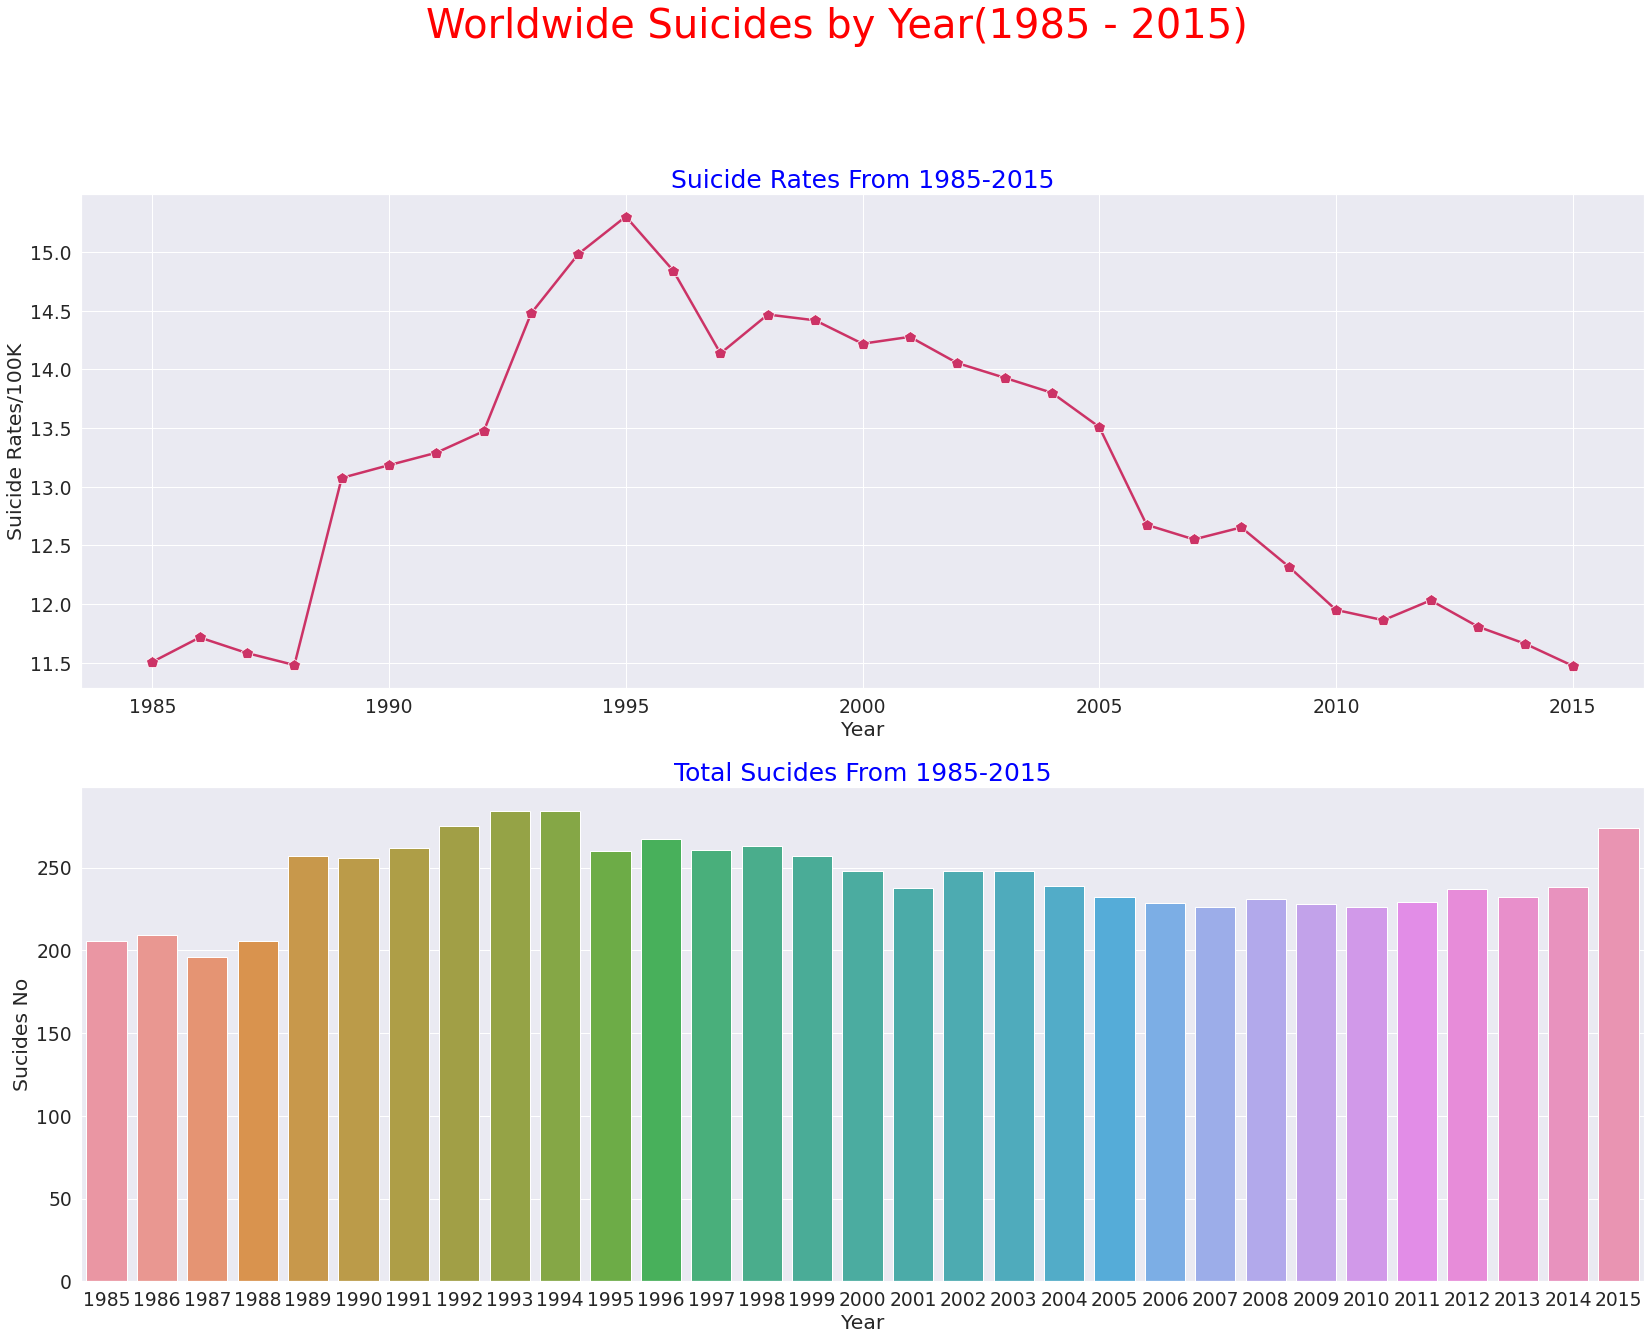

In [ ]:
#@title Worldwide Suicide Rates by Year (1985 - 2015)
ww_yearpop = suic_data.groupby('year').agg({'suicides_no':['sum'], 'population': ['sum']})
ww_yearpop.columns = ['total_suic', 'total_pop']
ww_yearpop = ww_yearpop.reset_index()
ww_yearpop['Suicide Rates / 100K People'] = ww_yearpop['total_suic'] / ww_yearpop['total_pop'] * 100000

suic_year_no = suic_data.groupby("year", as_index = False)["suicides_no"].mean().sort_values(by="suicides_no",ascending = False)

sns.set_style('darkgrid')
fig, axes = plt.subplots(2, 1, figsize=(28, 20))
fig.suptitle('Worldwide Suicides by Year(1985 - 2015)', color='r', fontsize=40, position=(0.5,1.01))
sns.set_context("notebook", font_scale=1.7, rc={"lines.linewidth": 2.5})

sns.lineplot(ax=axes[0], x="year", y="Suicide Rates / 100K People", marker='p', markersize=12, color='#CC3366', data=ww_yearpop)
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Suicide Rates/100K')
axes[0].set_title('Suicide Rates From 1985-2015', color='b', fontsize=25)

sns.barplot(ax=axes[1],x='year',y ='suicides_no',data = suic_year_no)
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Sucides No')
axes[1].set_title('Total Sucides From 1985-2015', color='b', fontsize=25)


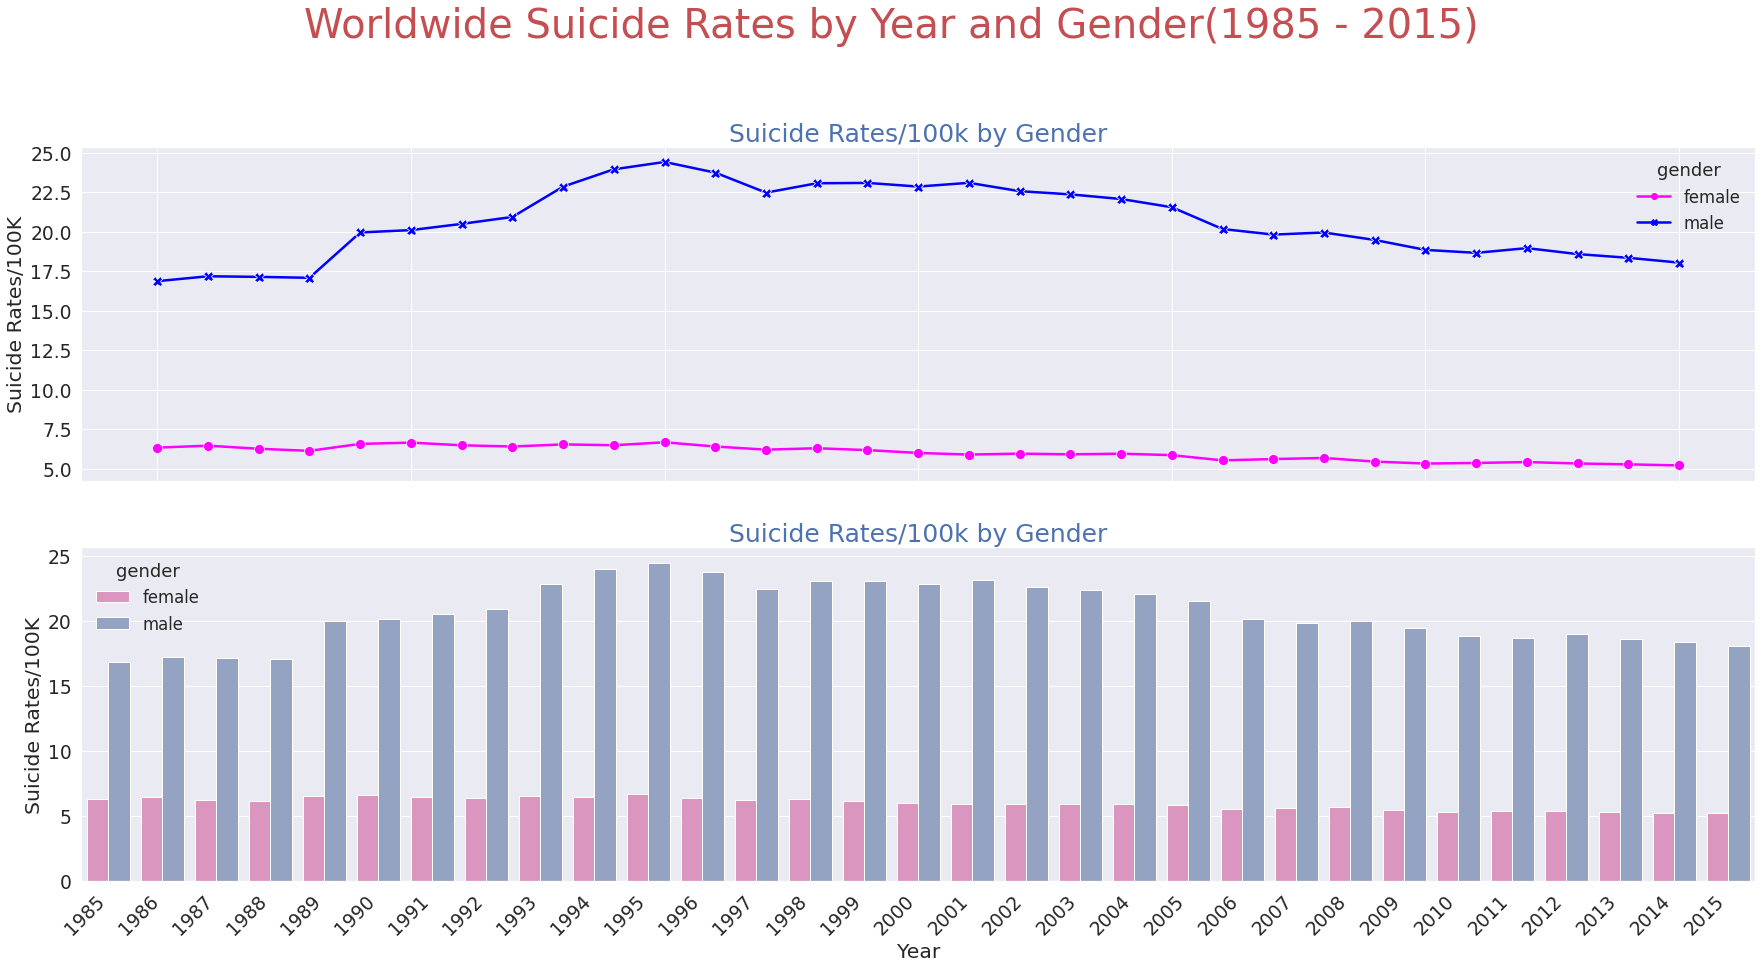

In [ ]:
#@title Worldwide Suicide Rates by Year and Gender(1985 - 2015)
ww_yearpop_sex = suic_data.groupby(['year', 'gender']).agg({'suicides_no':['sum'], 'population': ['sum']})
ww_yearpop_sex.columns = ['total_suic', 'total_pop']
ww_yearpop_sex = ww_yearpop_sex.reset_index()
ww_yearpop_sex['Suicide Rates/100K People'] = ww_yearpop_sex['total_suic'] / ww_yearpop_sex['total_pop'] * 100000

ww_sex = suic_data.groupby(by=['year','gender']).agg({'suicides_no': ['sum'], 'population': ['sum']})
ww_sex.columns = ['total_suic', 'total_pop']
ww_sex.reset_index(inplace=True)
ww_sex['Suicide Rates/100K People'] = ww_sex['total_suic'] / ww_sex['total_pop'] * 100000

cl = ["#e78ac3", "#8da0cb"]
color = sns.color_palette(cl)
sns.set_style('darkgrid')
fig, axes = plt.subplots(2, 1, figsize=(30, 15))
fig.suptitle('Worldwide Suicide Rates by Year and Gender(1985 - 2015)', color='r', fontsize=40, position=(0.5,1.01))
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

sns.lineplot(ax=axes[0],x="year", y="Suicide Rates/100K People", style="gender", hue="gender", palette=['magenta','blue'], data=ww_yearpop_sex, markersize=10, markers=True, dashes=False)
axes[0].set_title('Suicide Rates/100k by Gender', color='b', fontsize=25)
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Suicide Rates/100K')

sns.barplot(ax=axes[1], x='year', y='Suicide Rates/100K People',hue='gender', data= ww_sex, palette=color)
axes[1].set_title('Suicide Rates/100k by Gender', color='b', fontsize=25)
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Suicide Rates/100K')
fig.autofmt_xdate(rotation=45)


Text(0, 0.5, 'Suicide Rates/100K')

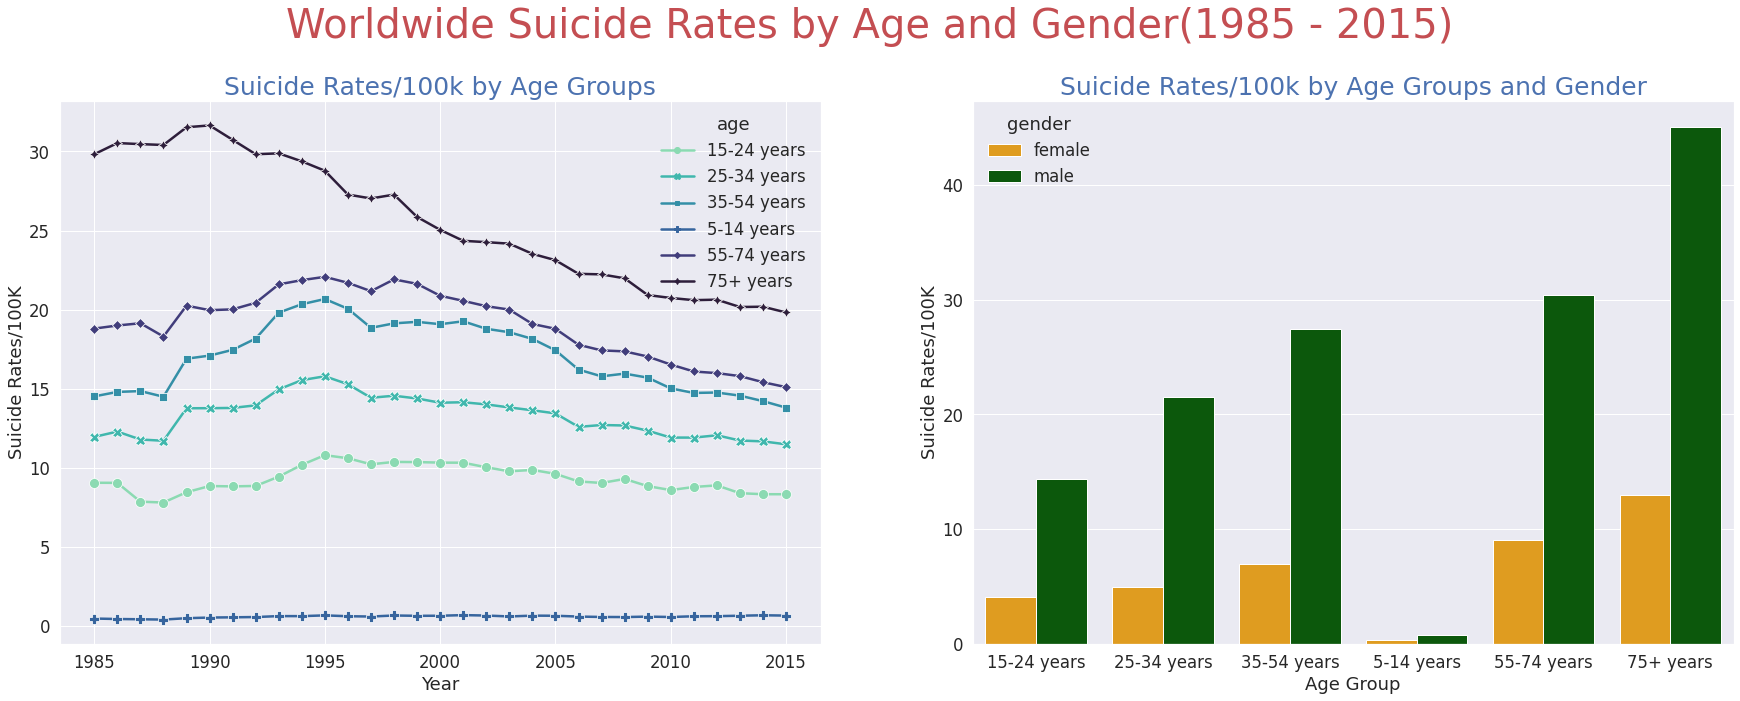

In [ ]:
#@title Worldwide Suicide Rates by Age and Gender(1985 - 2015)
ww_yearpop_age = suic_data.groupby(['year', 'age']).agg({'suicides_no':['sum'], 'population': ['sum']})
ww_yearpop_age.columns = ['total_suic', 'total_pop']
ww_yearpop_age = ww_yearpop_age.reset_index()
ww_yearpop_age['Suicide Rates / 100K People'] = ww_yearpop_age['total_suic'] / ww_yearpop_age['total_pop'] * 100000

ww_rate_sex = suic_data.groupby(by=['age', 'gender']).agg({'suicides_no': ['sum'], 'population': ['sum']})
ww_rate_sex.columns = ['total_suic', 'total_pop']
ww_rate_sex.reset_index(inplace=True)
ww_rate_sex['Suicide Rates/100K People'] = ww_rate_sex['total_suic'] / ww_rate_sex['total_pop'] * 100000

c1 = ["#FFA500", "#006400"]
color = sns.color_palette(c1)
sns.set_style('darkgrid')
fig, axes = plt.subplots(1, 2, figsize=(30, 10))
fig.suptitle('Worldwide Suicide Rates by Age and Gender(1985 - 2015)', color='r', fontsize=40, position=(0.5,1.01))
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

sns.lineplot(ax=axes[0],x="year", y="Suicide Rates / 100K People", style="age", hue="age", palette=palette, data=ww_yearpop_age, markersize=10, markers=True, dashes=False)
axes[0].set_title('Suicide Rates/100k by Age Groups', color='b', fontsize=25)
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Suicide Rates/100K')

sns.barplot(ax=axes[1], x='age', y='Suicide Rates/100K People', hue='gender', data= ww_rate_sex, palette=color)
axes[1].set_title('Suicide Rates/100k by Age Groups and Gender', color='b', fontsize=25)
axes[1].set_xlabel('Age Group')
axes[1].set_ylabel('Suicide Rates/100K')


Text(0, 0.5, 'Suicide Rates/100K')

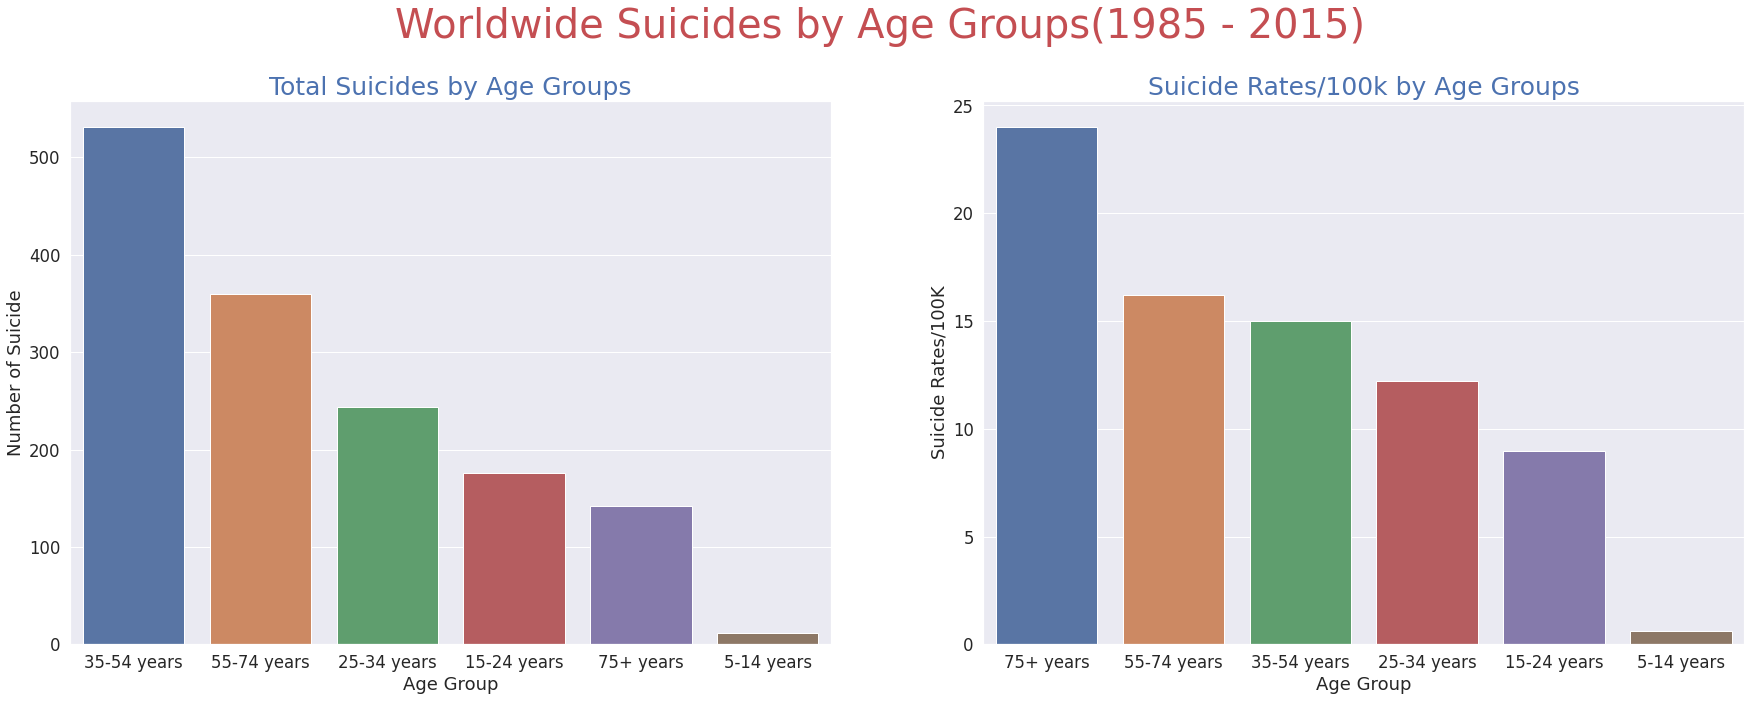

In [ ]:
#@title Worldwide Suicide Rates by Year and Age(1985 - 2015)
suic_age_no = suic_data.groupby("age", as_index = False)["suicides_no"].mean().sort_values(by="suicides_no",ascending = False)
suic_age_rate = suic_data.groupby("age", as_index = False)["suicide_per_100k"].mean().sort_values(by="suicide_per_100k",ascending = False)


fig, axes = plt.subplots(1, 2, figsize=(30, 10))
fig.suptitle('Worldwide Suicides by Age Groups(1985 - 2015)', color='r', fontsize=40, position=(0.5,1.01))

sns.barplot(ax=axes[0], x = "age", y = "suicides_no", data = suic_age_no)
axes[0].set_title('Total Suicides by Age Groups', color='b', fontsize=25)
axes[0].set_xlabel('Age Group')
axes[0].set_ylabel('Number of Suicide')

sns.barplot(ax=axes[1], x = "age", y = "suicide_per_100k", data = suic_age_rate)
axes[1].set_title('Suicide Rates/100k by Age Groups', color='b', fontsize=25)
axes[1].set_xlabel('Age Group')
axes[1].set_ylabel('Suicide Rates/100K')


Text(0, 0.5, 'Suicide Rates/100K')

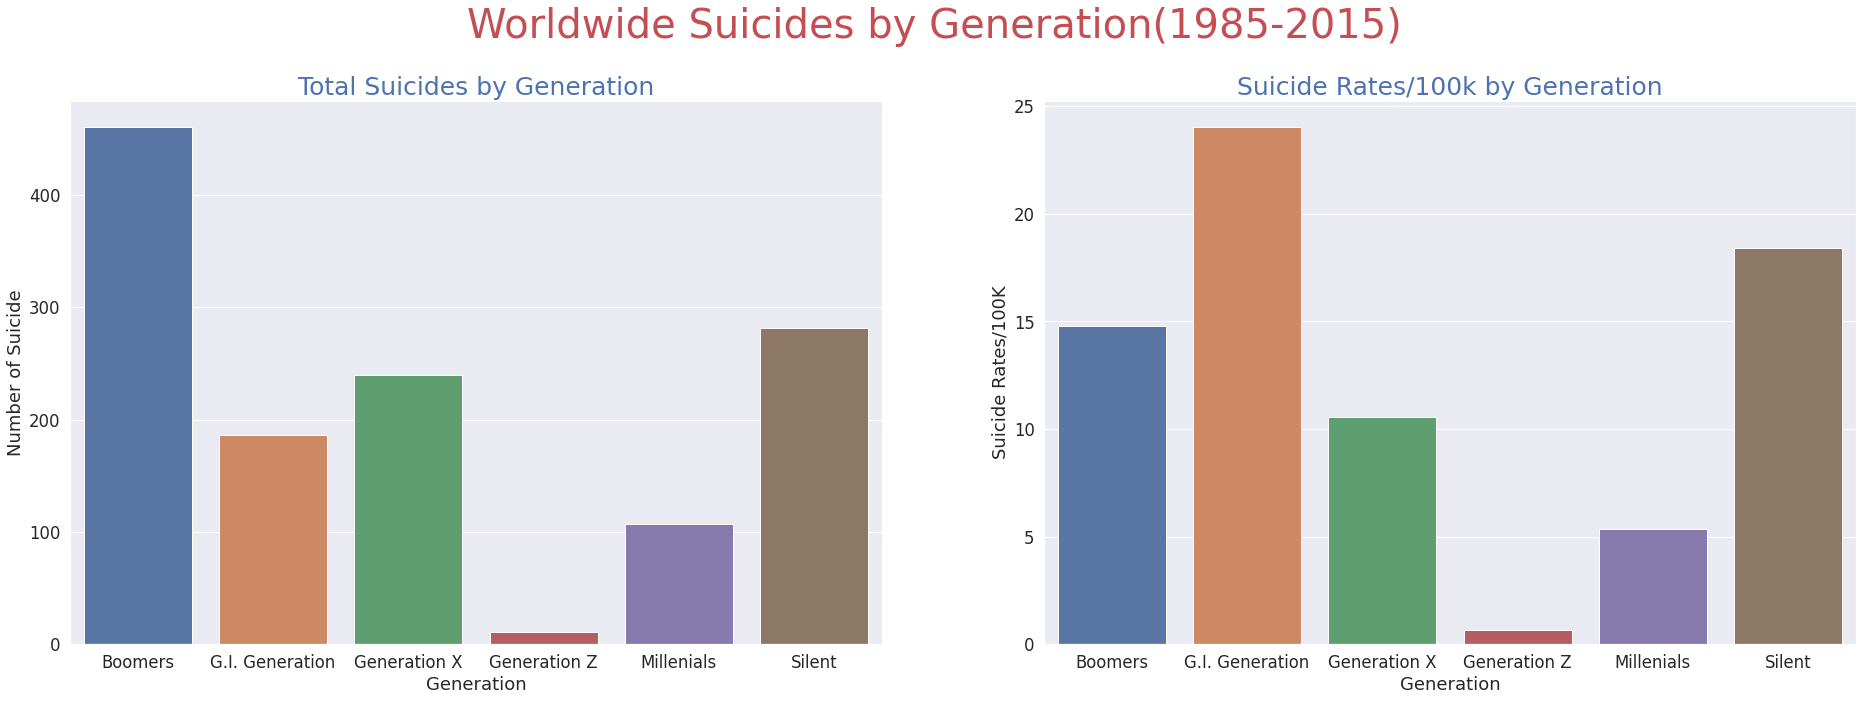

In [ ]:
#@title Worldwide Suicide Rates by Generation
suic_ge_no = suic_data.groupby("generation", as_index = False)["suicides_no"].mean()
suic_ge_rate = suic_data.groupby("generation", as_index = False)["suicide_per_100k"].mean()

fig, axes = plt.subplots(1, 2, figsize=(32, 10))
fig.suptitle('Worldwide Suicides by Generation(1985-2015)', color='r', fontsize=40, position=(0.5,1.01))

sns.barplot(ax=axes[0], x = "generation", y = "suicides_no", data = suic_ge_no)
axes[0].set_title('Total Suicides by Generation', color='b', fontsize=25)
axes[0].set_xlabel('Generation')
axes[0].set_ylabel('Number of Suicide')

sns.barplot(ax=axes[1], x = "generation", y = "suicide_per_100k", data = suic_ge_rate)
axes[1].set_title('Suicide Rates/100k by Generation', color='b', fontsize=25)
axes[1].set_xlabel('Generation')
axes[1].set_ylabel('Suicide Rates/100K')


Text(0.5, 1.0, 'Total number of Suicides from 1985-2015')

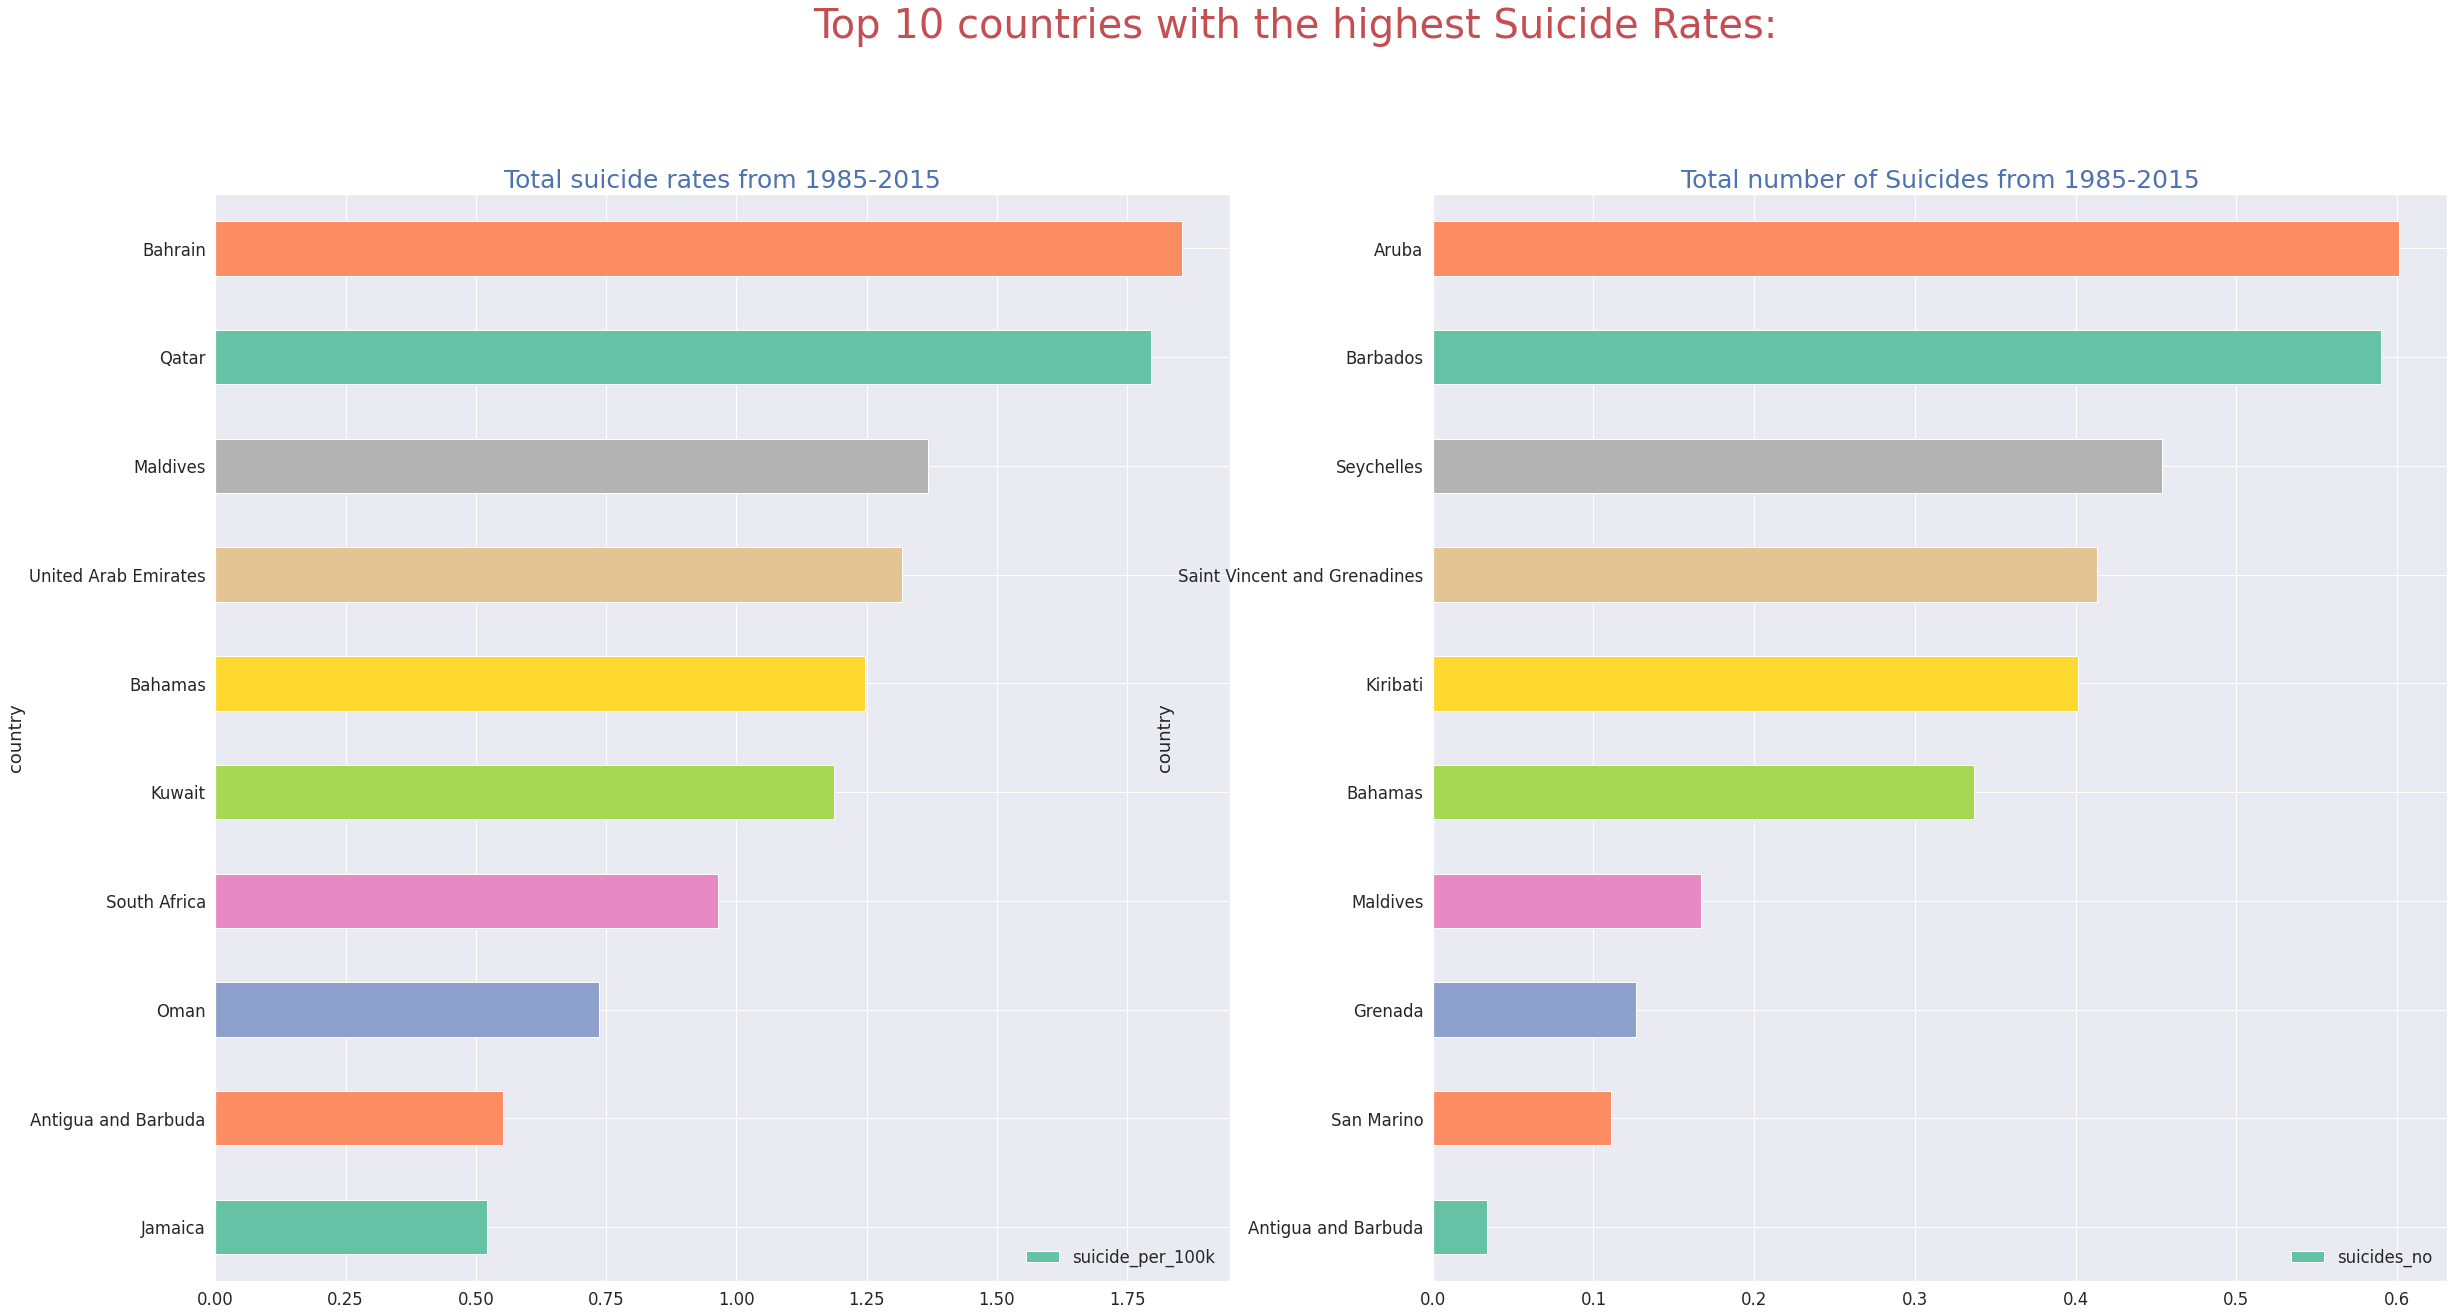

In [ ]:
#@title Top 10 countries with the highest Suicide Rates:
country_rank_pop = avg_suic_country.sort_values("suicide_per_100k",ascending = True).head(10)
country_rank_no = avg_no_country.sort_values("suicides_no",ascending = True).head(10)

fig, axes = plt.subplots(1, 2, figsize=(40, 20))
fig.suptitle('Top 10 countries with the highest Suicide Rates:', color='r', fontsize=40, position=(0.5,1.01))
c2 = sns.color_palette("Set2")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

country_rank_pop.plot(x='country',y='suicide_per_100k',kind='barh', color=c2, ax=axes[0])
axes[0].set_title('Total suicide rates from 1985-2015', color='b', fontsize='25')

country_rank_no.plot(x='country',y='suicides_no',kind='barh', color=c2, ax=axes[1])
axes[1].set_title('Total number of Suicides from 1985-2015', color='b', fontsize='25')

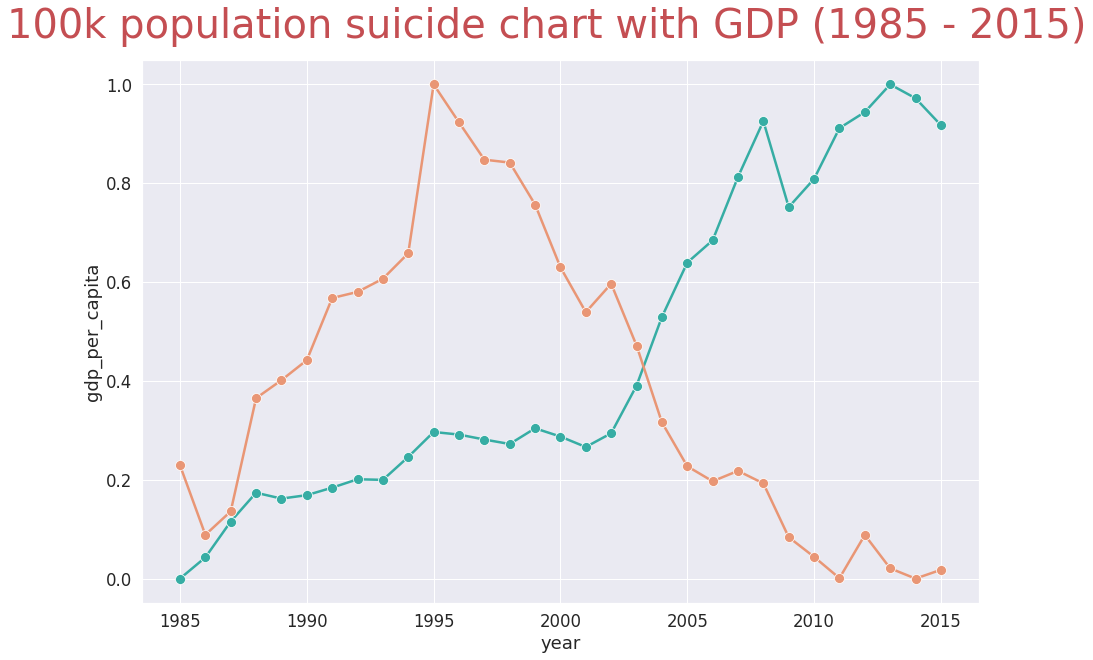

In [ ]:
suic_eco= suic_data.pivot_table(['suicide_per_100k','gdp_per_capita'],['year'], aggfunc='mean')
x = suic_eco.values

min_max_scaller = preprocessing.MinMaxScaler()
gdp_scale_data = min_max_scaller.fit_transform(x)
gdp_scale_data

suic_eco_scaled = pd.DataFrame(gdp_scale_data)
suic_eco_scaled.columns = suic_eco.columns
suic_eco_scaled.index = suic_eco.index
suic_eco_scaled.reset_index(inplace=True)

plt.figure(figsize=(15, 10))
sns.lineplot(x="year", y="gdp_per_capita", data=suic_eco_scaled, palette="tab10", marker='o', markersize=10, linewidth=2.5, color='#36ada4')
sns.lineplot(x="year", y="suicide_per_100k", data=suic_eco_scaled, palette="tab10", marker='o', markersize=10, linewidth=2.5, color='#e99675')

plt.figtext(.5,.91,'100k population suicide chart with GDP (1985 - 2015)', color='r', fontsize=40, ha='center')
plt.show()

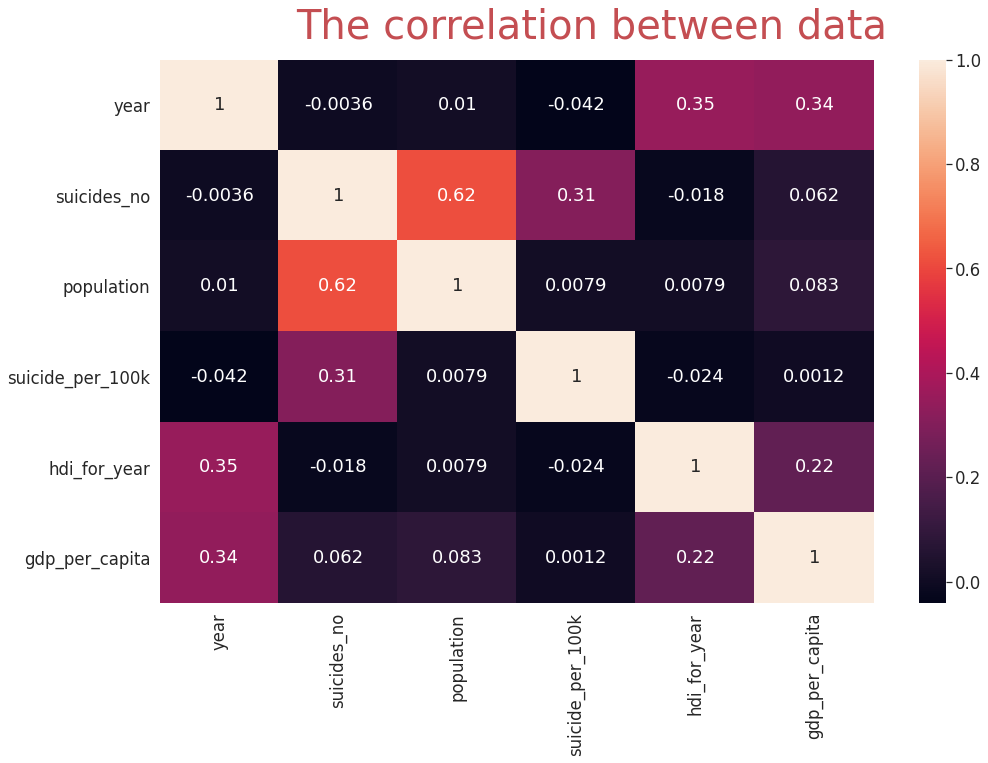

In [ ]:
#@title The correlation between data:
plt.figure(figsize=(16,10))
plt.figtext(.5,.91,'The correlation between data', color='r', fontsize=40, ha='center')
corr_data = sns.heatmap(suic_data.corr(), annot = True)

# **Machine learning**


---



สำรองข้อมูลใส่ในตัวแปรใหม่ เพื่อไม่ให้กระทบกับข้อมูลหลัก

In [ ]:
suic_copy=suic_data.copy()
suic_copy

,country,year,gender,age,suicides_no,population,suicide_per_100k,hdi_for_year,gdp_per_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,0.000,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,0.000,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,0.000,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,0.000,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,0.000,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,0.675,"63,067,077,179",2309,Generation Z


จัดการข้อมูลให้พร้อมใช้งาน

In [ ]:
suic_copy['gender'].replace({
    'male':0,
    'female':1
}, inplace = True)
suic_copy['generation'].replace({
    'Boomers':0,
    'G.I. Generation':1,
    'Generation X':2,
    'Generation Z':3,
    'Millenials':4,
    'Silent':5
}, inplace = True)
suic_copy

,country,year,gender,age,suicides_no,population,suicide_per_100k,hdi_for_year,gdp_per_year,gdp_per_capita,generation
0,Albania,1987,0,15-24 years,21,312900,6.71,0.000,"2,156,624,900",796,2
1,Albania,1987,0,35-54 years,16,308000,5.19,0.000,"2,156,624,900",796,5
2,Albania,1987,1,15-24 years,14,289700,4.83,0.000,"2,156,624,900",796,2
3,Albania,1987,0,75+ years,1,21800,4.59,0.000,"2,156,624,900",796,1
4,Albania,1987,0,25-34 years,9,274300,3.28,0.000,"2,156,624,900",796,0
...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,1,35-54 years,107,3620833,2.96,0.675,"63,067,077,179",2309,2
27816,Uzbekistan,2014,1,75+ years,9,348465,2.58,0.675,"63,067,077,179",2309,5
27817,Uzbekistan,2014,0,5-14 years,60,2762158,2.17,0.675,"63,067,077,179",2309,3
27818,Uzbekistan,2014,1,5-14 years,44,2631600,1.67,0.675,"63,067,077,179",2309,3


## กำหนดขอบเขตการวิเคราะห์ข้อมูลให้เหมาะสมกับการใช้งาน

In [ ]:
suic_copy.drop("gdp_per_year", axis=1, inplace=True)
# suic_copy.drop("hdi_for_year", axis=1, inplace = True)
suic_copy.drop("suicide_per_100k", axis=1, inplace=True)
suic_copy.drop("age", axis=1, inplace=True)
suic_copy.drop("country", axis=1 , inplace=True)
# suic_copy.drop("population", axis=1, inplace=True)
suic_copy.drop("gdp_per_capita", axis=1, inplace=True)

จักเรียงข้อมูลและเลือกกลุ่มตัวอย่างจากกลุ่มข้อมูล

In [ ]:
# suic_copy=suic_copy.groupby("year").mean()
suic_copy=suic_copy.sort_values('suicides_no')
suic_copy=suic_copy.iloc[::200]
suic_copy

,year,gender,suicides_no,population,hdi_for_year,generation
13314,2005,1,0,145843,0.729,5
10404,1985,0,0,11950,0.000,2
21303,1986,1,0,1600,0.000,1
2556,2007,1,0,30101,0.000,4
2455,1998,0,0,1939,0.000,1
...,...,...,...,...,...,...
19284,2010,0,1621,3547737,0.829,5
27178,2012,1,2264,32244829,0.912,0
9832,2000,0,2937,12201076,0.855,0
27054,2002,0,4890,21085316,0.000,5


เพิ่ม libery สำหรับการใช้งาน

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

แบ่งชุดข้อมูลการตรวจสอบความถูกต้องของชุดข้อมูล

In [ ]:
from sklearn.model_selection import train_test_split

array = suic_copy.values
y = suic_copy['suicides_no']
X = suic_copy.drop('suicides_no', axis =1)
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

X_validation

,year,gender,population,hdi_for_year,generation
754,1998,1,3353473,0.000,4
10075,1989,1,342500,0.000,1
9325,2004,1,3604504,0.000,4
27717,2003,1,2713618,0.000,4
2918,1987,1,22200,0.000,0
25772,1991,0,369500,0.000,2
6820,2007,0,750899,0.000,3
19715,1987,1,338600,0.000,2
26391,2014,1,1959353,0.747,3
9057,2013,1,321757,0.882,4


ตรวจสอบขนาดของข้อมูลนำมาใช้งาน

In [ ]:
print(X.shape)
print(y.shape)

(139, 5)
(139,)


In [ ]:
print(X_train.shape)
print(X_validation.shape)
print(y)

(111, 5)
(28, 5)
13314        0
10404        0
21303        0
2556         0
2455         0
         ...  
19284     1621
27178     2264
9832      2937
27054     4890
21117    17465
Name: suicides_no, Length: 139, dtype: int64


สร้างแบบจำลองและสร้างอาร์เรย์ของอัลกอริทึมการจำแนกประเภท ML ภายใต้การดูแลทั้งหมดที่จะใช้ พร้อมกับคำนวณค่าความถูกต้องของแต่ละโมเดล

In [ ]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=2, random_state=1, shuffle=True)

	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')

	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.153247 (0.010390)
LDA: 0.072078 (0.000649)
KNN: 0.135065 (0.007792)
CART: 0.062825 (0.026461)
NB: 0.153247 (0.010390)
SVM: 0.162175 (0.001461)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in 

นำโมเดลที่มีค่าความถูกต้องมากที่สุดมาสร้างโมเดลสำหรับการคาดการณ์ข้อมูล

---
ซึ่งโมเดลที่ได้มาคือ SVM: 0.162175 (0.001461) และใช้ฟังก์ชัน SVC(gamma='auto') ในการสร้างโมเดล


In [ ]:
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)
print(predictions)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


แสดงผลลัพธ์ที่คาดการณ์ไว้

In [ ]:
print(accuracy_score(Y_validation, predictions))
print()
print(confusion_matrix(Y_validation, predictions))
print()
print(classification_report(Y_validation, predictions))

0.14285714285714285

[[4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]

              precision    recal

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
